In [1]:
#Data 
revenue = [14574.49, 7606.46, 8611.41, 9175.41, 8058.65, 8105.44, 11496.28, 9766.09, 10305.32, 14379.96, 10713.97, 15433.50]
expenses = [12051.82, 5695.07, 12319.20, 12089.72, 8658.57, 840.20, 3285.73, 5821.12, 6976.93, 16618.61, 10054.37, 3803.96]

In [2]:
 '''Questions
- profit for each month
- profit after tax for each month (the tax rate is 30%)
- profit margin for each month - equals to profit after tax divided by revenue
- good months - where the profit after tax was greater than the mean for the year
- bad months - where the profit after tax was less than the mean for the year
- the best month - where the profit after tax was max for the year
- the worst month - where the profit after tax was min for the year'''

'Questions\n- profit for each month\n- profit after tax for each month (the tax rate is 30%)\n- profit margin for each month - equals to profit after tax divided by revenue\n- good months - where the profit after tax was greater than the mean for the year\n- bad months - where the profit after tax was less than the mean for the year\n- the best month - where the profit after tax was max for the year\n- the worst month - where the profit after tax was min for the year'

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
x = np.arange(len(revenue))
labels = ['Jan','Feb',' Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov', 'Dec' ]

df = pd.DataFrame(index = labels, columns = ['revenue', 'expenses'])

difference = []
[difference.append(i-j) for i,j in zip(revenue, expenses)]

df['revenue']=revenue
df['expenses']=expenses
df['P/L']=difference

In [5]:
df

,revenue,expenses,P/L
Jan,14574.49,12051.82,2522.67
Feb,7606.46,5695.07,1911.39
Mar,8611.41,12319.20,-3707.79
Apr,9175.41,12089.72,-2914.31
May,8058.65,8658.57,-599.92
Jun,8105.44,840.20,7265.24
Jul,11496.28,3285.73,8210.55
Aug,9766.09,5821.12,3944.97
Sep,10305.32,6976.93,3328.39
Oct,14379.96,16618.61,-2238.65


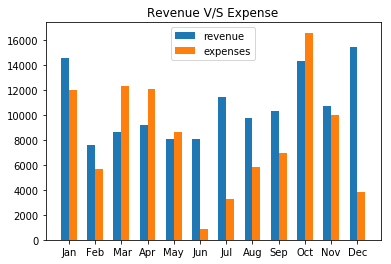

In [6]:
fig, ax = plt.subplots()
rects1 = ax.bar(x-0.3/2, revenue, width = 0.3, label='revenue')
rects2 = ax.bar(x+0.3/2, expenses, width = 0.3, label='expenses')

ax.set_title('Revenue V/S Expense')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

Text(0.5, 1.0, 'Revenue V/S Expense')

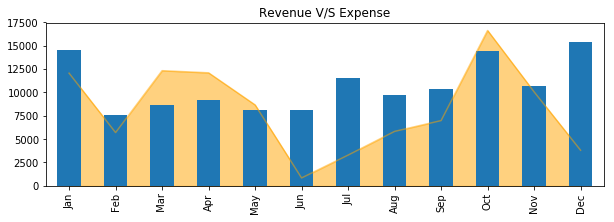

In [44]:
df['expenses'].plot(kind='area', alpha=0.5, figsize=(10, 3), color='orange') 
df['revenue'].plot(kind='bar', alpha=1, figsize=(10, 3))
plt.title('Revenue V/S Expense')

Text(0.5, 1.0, 'Monthwise Profit/Loss')

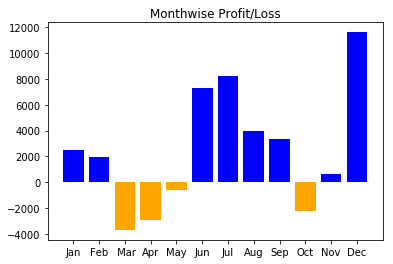

In [45]:
def bar_color(df,color1,color2):
    return np.where(df.values>0,color1,color2).T

plt.bar(labels, difference, color=bar_color(df['P/L'],'b','orange'))
plt.title('Monthwise Profit/Loss')

In [43]:
df['Tax'] = df['revenue'] *0.3
df['Pure_Profit'] = df['revenue'] - df['revenue'] *0.3
df['Profit_Margin'] = df['Pure_Profit'] / df['revenue']
df

,revenue,expenses,P/L,Tax,Pure_Profit,Profit_Margin
Jan,14574.49,12051.82,2522.67,4372.347,10202.143,0.7
Feb,7606.46,5695.07,1911.39,2281.938,5324.522,0.7
Mar,8611.41,12319.20,-3707.79,2583.423,6027.987,0.7
Apr,9175.41,12089.72,-2914.31,2752.623,6422.787,0.7
May,8058.65,8658.57,-599.92,2417.595,5641.055,0.7
Jun,8105.44,840.20,7265.24,2431.632,5673.808,0.7
Jul,11496.28,3285.73,8210.55,3448.884,8047.396,0.7
Aug,9766.09,5821.12,3944.97,2929.827,6836.263,0.7
Sep,10305.32,6976.93,3328.39,3091.596,7213.724,0.7
Oct,14379.96,16618.61,-2238.65,4313.988,10065.972,0.7


In [41]:
# Mean Profit after Tax
df['Pure_Profit'].mean()

7479.907166666667

In [39]:
# Good months - 
list(df.index[df['Pure_Profit'] > df['Pure_Profit'].mean()])

['Jan', 'Jul', 'Oct', 'Nov', 'Dec']

In [40]:
# Bad months - 
list(df.index[df['Pure_Profit'] < df['Pure_Profit'].mean()])

['Feb', ' Mar', 'Apr', 'May', 'Jun', 'Aug', 'Sep']

In [34]:
# Best month -  
list(df.index[df['Pure_Profit'] == df['Pure_Profit'].max()])

['Dec']

In [37]:
# Worst month -  
list(df.index[df['Pure_Profit'] == df['Pure_Profit'].min()])

['Feb']